In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from bcb import currency

# Análise de Retornos

Vamos considerar os seguintes investimentos em ações:

- Investimento em WEGE3 a R\\$ 42,03 em junho/2020 e venda em julho/2020 a R\\$ 67,32, lucro de R\\$ 25,29 por ação em 2 meses.
- Investimento em OIBR3 a R\\$ 0,49 em abril/2020 e venda em junho/2020 a R\\$ 1,20, lucro de R\\$ 0,71 por ação em 3 meses.
- Investimento em VVAR3 a R\\$ 4,65 em abril/2020 e venda em setembro/2020 a R\\$ 17,87, lucro de R\\$ 13,22 por ação em 6 meses.

Qual investimento tem o melhor *retorno*?

O investimento em WEGE3 apresenta o melhor resultado financeiro, pois é o que paga o maior *retorno* por ação, R\\$ 25,29.

Calculando o resultado percentual temos

In [2]:
variações = pd.DataFrame(
    [[(67.32 - 42.03) / 42.03, (1.20 - 0.49) / 0.49, (17.87 - 4.65) / 4.65]],
    columns=['WEGE3', 'OIBR3', 'VVAR3']
)

variações.style.hide_index()

WEGE3,OIBR3,VVAR3
0.601713,1.448980,2.843011


O *retorno* _percentual_ no período total da VVAR3 foi o dobro da OIBR3 e o quatro vezes o da WEGE3.

Se ainda considerarmos o prazo do investimento de forma linear, ou seja, dividindo o retorno percentual pelo prazo em meses do investimento, temos:

In [3]:
meses = [2, 3, 6]

variações_mês = variações / meses

variações_mês.style.hide_index()

WEGE3,OIBR3,VVAR3
0.300857,0.482993,0.473835


O *retorno* por mês da OIBR3 é um pouco maior que o retorno da VVAR3, na prática muito próximos.

O que podemos extrair desses exemplos?

- Há diversas formas de avaliar o resultado entregue por um investimento: financeiro, percentual, ajustado ao prazo e outras formas.
- **retorno** é um termo utilizado para fazer referência ao resultado de um investimento.

Veremos nas próximas seções algumas formas de calcular o retorno de um investimento e como utilizar o retorno para fazer a análise de risco do investimento.

O que são retornos?

> Os retornos (retornos financeiros) representam a variação no preço dos nossos investimentos.

Exemplo: Variação do preço de fechamento do ETF BOVA11 entre 31-01-2020 e 30-09-2020.

In [4]:
BOVA11 = yf.download('BOVA11.SA', start='2020-01-31', end='2020-10-01', progress=False)
BOVA11.loc[['2020-01-31', '2020-09-30'], ['Close']]

,Close
Date,
2020-01-31,108.900002
2020-09-30,91.050003


Vamos calcular a variação total dos preços usando a função `diff`

In [5]:
BOVA11.loc[['2020-01-31', '2020-09-30'], ['Close']].diff()

,Close
Date,
2020-01-31,NaN
2020-09-30,-17.849998


Entre as datas 31-01-2020 e 30-09-2020 o cotação do BOVA11 perdeu R$ 17,85, pois temos uma variação negativa.
Essa é a variação total, simplismente a diferença dos preços em instantes de tempo diferentes.

Exemplo: Variação da cotação do Dólar Americano em Reais entre 31-01-2020 e 30-09-2020.

In [6]:
USDBRL = currency.get('USD', start_date='2020-01-31', end_date='2020-10-01')[[('USD', 'ask')]]
USDBRL.loc[['2020-01-31', '2020-09-30']]

,USD
,ask
Date,
2020-01-31,4.2695
2020-09-30,5.6407


Vamos calcular a variação total dos preços usando a função `diff`

In [7]:
USDBRL.loc[['2020-01-31', '2020-09-30']].diff()

,USD
,ask
Date,
2020-01-31,NaN
2020-09-30,1.3712



Note que entre as datas 31-01-2020 e 30-09-2020 o cotação do Dólar Americano perdeu R$ 1,3712, pelo menos 1 ordem de grandeza menor que o BOVA11, em módulo.

A variação total pode ser considerada uma medida de retorno, entretanto, ela está muito vinculada ao valor do ativo.
Vamos considerar $P_t$ o valor do ativo em um instante $t$ qualquer.
A **variação** deste ativo entre os instantes $t$ e $t-1$ é dada por:

$$
\Delta P_t = P_t - P_{t-1}
$$

Chamamos esta variação total de $\Delta P_t$ onde $t$ representa um instante qualquer no tempo e $t-1$ é o instante anterior na série.
Em nosso exemplo $t$ é a primeira data e $t-1$  a segunda.

Como observamos, no mesmo período, os dois ativos apresentam medidas muito diferentes, logo, com esta medida é difícil comparar os 2 ativos.

<!-- Pergunta: Quanto de retorno teríamos se tivessemos investido a mesma quantia em ambos os ativos? -->

Há duas formas de calcular os retornos de maneira que possamos comparar os investimentos.

1. Retornos Simples: calculados a partir da variação percentual dos preços com referência ao valor inicial
1. Retornos Logarítimicos: calculados a partir da variação do logarítimo dos preços

Nas próximas seções vamos detalhar estes tipos de retornos e como calculá-los.

## Retornos simples

Os retornos simples são a variação percentual dos preços de um ativo.

Do exemplo do BOVA11 temos a diferença dos preços nas datas 31-01-2020 e 30-09-2020.

In [8]:
BOVA11.loc[['2020-01-31', '2020-09-30'], ['Close']].diff()

,Close
Date,
2020-01-31,NaN
2020-09-30,-17.849998


Dada a diferença, só precisamos dividir pelo preço inicial, na data 31-01-2020.


In [9]:
ini_price = BOVA11.loc['2020-01-31', 'Close']

diff = BOVA11.loc[['2020-01-31', '2020-09-30'], ['Close']].diff()

diff / ini_price

,Close
Date,
2020-01-31,NaN
2020-09-30,-0.163912


O BOVA11 apresentou uma variação negativa de 16,39% no período.

Usando os dados do Dólar Americano temos


In [10]:
ini_price = USDBRL.loc['2020-01-31']

diff = USDBRL.loc[['2020-01-31', '2020-09-30']].diff()

diff / ini_price

,USD
,ask
Date,
2020-01-31,NaN
2020-09-30,0.321162


O Dólar Americano apresentou uma variação positiva de 32,11% no período, aproximadamente o dobro da variação do BOVA11, em módulo.

Colocando em equação, a variação percentual é dada pela divisão de $\Delta P_t$ pelo seu valor inicial, $P_{t-1}$, dessa forma calculamos o retorno simples $R_t$.

\begin{equation}
R_t = \frac{\Delta P_t}{P_{t-1}} = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1
%(\#eq:simple-return)
\end{equation}

O cálculo do retorno simples para dois instantes de tempo é útil para cálculos isolados, na prática queremos calcular retornos compostos em diferentes períodos em sequência.
Queremos responder a perguntas como:

- Para uma série de preços diários de um ativo, calculamos os retornos simples diários, qual é a média dos retornos diários no período?
- Para uma série de retornos diários de um ativo, como calcular o retorno mensal?
- Dado o retorno mensal, qual é o retorno médio diário?


### Retornos Simples Multiperíodo

Vamos calcular os retornos simples a partir de uma série de preços.
Com uma série temporal no Python (um pandas DataFrame) calculamos a variação usando o método `diff` para a série do Dólar Americano entre as datas 01-09-2020 e 04-09-2020.


In [11]:
USDBRL = currency.get("USD", start_date = '2020-09-01', end_date = '2020-09-04')[[('USD', 'ask')]]
pd.concat([USDBRL, USDBRL.diff()], axis=1).set_axis(['P_t', 'diff'], axis=1)

,P_t,diff
Date,,
2020-09-01,5.3732,NaN
2020-09-02,5.3741,0.0009
2020-09-03,5.3079,-0.0662
2020-09-04,5.2848,-0.0231


O primeiro elemento do vetor de diferenças é um `NaN` porque o cálculo das diferenças é entre o elemento corrente com o anterior e para o primeiro elemento não há um elemento anterior para realizar o cálculo, dessa forma o pandas mantém a estrutura de índices e indica que o resultado para o índice em questão não está disponível.

> Usamos `set_axis` para renomear `USDBRL.diff()` que vem com o nome `ask`, que é o mesmo da série original.
> Isso é interessante e uma ótima alternativa para organizar a apresentação dos dados.
> Usamos também a função `concat` para *juntar* as séries de preço e diferenças.

A série `diff` é a série de diferenças, logo, representa $\Delta P_t$.

Para realizar este cálculo de $R_t$ no R é necessário obter a série de $P_{t-1}$.
Isso pode ser feito com o método `shift` da série temporal.

In [12]:
pd.concat([USDBRL, USDBRL.shift(), USDBRL.diff()], axis=1).set_axis(['P_t', 'P_t1', 'diff'], axis=1)

,P_t,P_t1,diff
Date,,,
2020-09-01,5.3732,NaN,NaN
2020-09-02,5.3741,5.3732,0.0009
2020-09-03,5.3079,5.3741,-0.0662
2020-09-04,5.2848,5.3079,-0.0231


Note que essa função desloca a série tempora em 1 elemento adiante.
Aqui a coluna `P_t1` refere-se a $P_{t-1}$.
Uma boa forma de ler esse resultado é que em $t$  igual a `2020-09-02`, $P_{t-1}$ é `5.3732`, que é o valor de $P_t$ quando $t$ é `2020-09-01`, ou seja, o instante anterior.

Assim, o retorno $R_t$ é calculado no pandas da seguinte maneira:

In [13]:
(USDBRL.diff() / USDBRL.shift()).set_axis(['R_t'], axis=1)

,R_t
Date,
2020-09-01,NaN
2020-09-02,0.000167
2020-09-03,-0.012318
2020-09-04,-0.004352


Dessa forma calculamos os retornos simples para uma série temporal.
Neste exemplo calculamos os retornos diários, pois a série é de cotações diárias.
É comum trabalharmos com séries com períodos maiores como séries semanais, mensais ou anuais.
Logo, utilizando ainda a série do Dólar Americano, vamos obter a série mensal de preços e desta série vamos obter a série de retornos mensais para o ano de 2019.


In [14]:
USDBRL_2019 = currency.get("USD", start_date='2018-12-31', end_date='2019-12-31')[[('USD', 'ask')]]

USDBRL_2019_monthly = USDBRL_2019.resample('M').ohlc()

USDBRL_2019_monthly

USD                        
               ask                        
              open    high     low   close
Date                                      
2018-12-31  3.8748  3.8748  3.8748  3.8748
2019-01-31  3.8595  3.8595  3.6519  3.6519
2019-02-28  3.6694  3.7756  3.6694  3.7385
2019-03-31  3.7832  3.9682  3.7762  3.8967
2019-04-30  3.8682  3.9725  3.8345  3.9453
2019-05-31  3.9650  4.1056  3.9344  3.9407
2019-06-30  3.9003  3.9003  3.8234  3.8322
2019-07-31  3.8193  3.8564  3.7400  3.7649
2019-08-31  3.8296  4.1680  3.8296  4.1385
2019-09-30  4.1581  4.1827  4.0494  4.1644
2019-10-31  4.1740  4.1740  3.9793  4.0041
2019-11-30  3.9786  4.2602  3.9786  4.2240
2019-12-31  4.2261  4.2261  4.0307  4.0307


Note que aqui o argumento `start_date = "2018-12-31"`, definimos dessa maneira para que a série de preços começe com os dados de dezembro/2018 e assim ao construirmos a série mensal para o cálculo dos retornos tenhamos o retorno de janeiro/2019.
De outra forma teríamos o retorno de janeiro/2019 igual a `NaN`.

Agora vamos calcular os retornos simples para a série mensal de cotações do Dólar Americano.

In [15]:
USDBRL_2019_monthly = USDBRL_2019_monthly[('USD', 'ask')][['close']]

USDBRL_2019_monthly_returns = (USDBRL_2019_monthly.diff() / USDBRL_2019_monthly.shift()).set_axis(['R_t'], axis=1)

In [16]:
USDBRL_2019_monthly_returns

,R_t
Date,
2018-12-31,NaN
2019-01-31,-0.057526
2019-02-28,0.023714
2019-03-31,0.042316
2019-04-30,0.012472
2019-05-31,-0.001166
2019-06-30,-0.027533
2019-07-31,-0.017562
2019-08-31,0.099232


Visualizando os dados em um gráfico de barras.

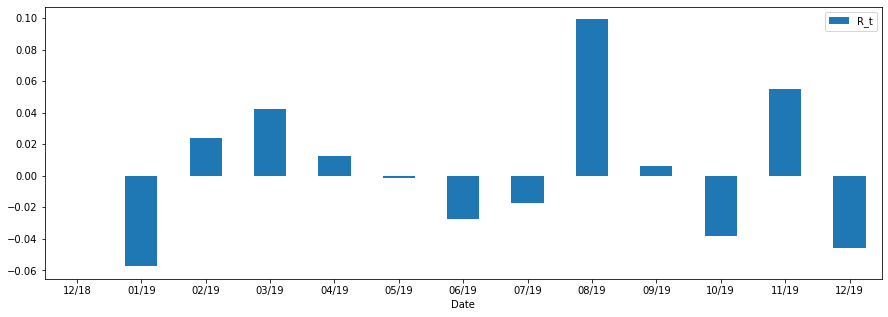

In [17]:
USDBRL_2019_monthly_returns\
    .reset_index()\
    .assign(Date=lambda x: x['Date'].dt.strftime('%m/%y'))\
    .plot.bar(x='Date', y='R_t', rot=0, figsize=(15,5));

### Entendendo os preços em função dos retornos

Vimos com escrever os retornos em função dos preços, uma outra forma de entender os retornos simples é inverter a equação de retornos simples ($R_t$) e escrevê-la em termos do preço $P_t$.

\begin{equation}
P_t = P_{t-1} (1 + R_t) = P_{t-1} + R_t P_{t-1}
%(\#eq:arithmetic-price)
\end{equation}

O preço $P_t$ pode ser interpretado como um choque do retorno $R_t$ no preço $P_{t-1}$.
O retorno $R_t$ está associado ao período entre os instantes $t$ e $t-1$, de forma análoga, $R_{t-1}$ está associado aos instantes $t-1$ e $t-2$, e assim por diante para diferentes valores de $t$.
Por isso o retorno simples também é conhecido como **retorno discreto**, pois, para cada período entre instantes dois instantes de tempo temos um choque discreto associado a cada movimento dos preços.

### Composição de retornos simples

Vimos como obter a série de retornos a partir da série de preços de um ativo.
Agora vamos ver como obter a série de preços a partir da série de retornos e para isso é necessário entender como compor os retornos.

A composição de retornos ajuda a responder a pergunta: Dado que temos os retornos simples de dois meses consecutivos, qual é o retorno total nos dois meses?
Para obter os retornos mensais partimos da série de preços diários, para obter os retornos de 2 meses podemos partir da série de preços de 2 meses.
Contudo, podemos partir da série de retornos mensais e criar uma série de retornos bimestrais compondo os retornos mensais.
Isso vale para dois meses e vale para $N$ meses, podemos construir séries de retornos trimestrais, semestrais e assim por diante.

Vamos começar com um exemplo estático.
Da série `USDBRL_2019_monthly_returns` vamos pegar os retonos dos últimos 2 meses, novembro e dezembro de 2019.

In [18]:
USDBRL_2019_monthly_returns.tail(2)

,R_t
Date,
2019-11-30,0.054919
2019-12-31,-0.045762


Em novembro/2019 tivemos um retorno de 5,49% e em dezembro/2019 um retorno negativo de -4,57%.
O retorno total no período é dado pela equação

\begin{equation}
R_{nov-dez/19} = (1 + R_{nov/19})(1 + R_{dez/19}) - 1
%(\#eq:simple-return-composed-2-months)
\end{equation}

Dessa forma, no pandas, utilizamos o método `prod` para calcular o retorno composto para este período.

In [19]:
(1 + USDBRL_2019_monthly_returns.tail(2)).prod() - 1

R_t    0.006643
dtype: float64

O retorno total é de 0,66%, praticamente zero, devido a queda de dezembro.

Mas de onde vem a equação $R_{nov-dez/19}$?
Vamos demostrar.

Temos os retonos $R_t$ e $R_{t-1}$ referentes aos meses de novembro e dezembro de 2019.
Vamos começar escrevendo o preço $P_t$ conforme a equação do preço.

\begin{equation}
P_t = P_{t-1} (1 + R_t)
\end{equation}

Aqui temos o preço de dezembro/2019 ($t$) como função do preço de novembro/2019 ($t-1$).
Vamos escrever $P_{t-1}$ também segundo a equação do preço substituindo na equação acima.

\begin{equation}
P_t = P_{t-2} (1 + R_{t-1}) (1 + R_t)
\end{equation}

Agora temos o preço de dezembro/2019 ($t$) como função do preço de outubro/2019 ($t-2$)
Temos também os retornos $R_t$ e $R_{t-1}$ compostos produzindo o retorno total no período de novembro-dezembro/2019.
Para simplificar podemos escrever

\begin{equation}
P_t = P_{t-2} (1 + \bar{R}_{2})
\end{equation}

onde $(1 + \bar{R}_{2})$ é o retorno total no período de dois meses.

Generalizando para $N$ meses (ou dias, ou anos) temos que o retorno total neste período é dado por:

\begin{equation}
(1 + \bar{R}_{N}) = \prod_{i=0}^{N-1} (1 + R_{t-i})
%(\#eq:simple-return-composed)
\end{equation}

Podemos calcular o retorno simples para todo o ano de 2019 utilizando o método `prod` do DataFrame pandas.

In [20]:
(1 + USDBRL_2019_monthly_returns.dropna()).prod() - 1

R_t    0.040234
dtype: float64

Dessa forma descobrimos que no ano de 2019 o Dólar Americano teve uma valorização de 4,02%.

Foi necessário utilizar o método `dropna` para remover o `NaN` do primeiro elemento do cálculo dos produtos acumulados.

<!-- > As funções `cumsum`, `cumprod`, `cummax` e `cummin` não possuem o argumento `na.rm` que exclui os elementos com `NA` da operação, como acontece com as funções `sum`, `prod`, `max` e `min`.
> Por este motivo é importante fazer este tratamento antes de executar estas funções.
 -->
 
No pandas podemos ainda calcular o calcular a série de retornos simples compostos usando o método `cumprod`:

In [21]:
(1 + USDBRL_2019_monthly_returns.dropna()).cumprod() - 1

,R_t
Date,
2019-01-31,-0.057526
2019-02-28,-0.035176
2019-03-31,0.005652
2019-04-30,0.018194
2019-05-31,0.017007
2019-06-30,-0.010994
2019-07-31,-0.028363
2019-08-31,0.068055
2019-09-30,0.074739


### Visualização de retornos compostos

Vamos ver aqui algumas formas de visualizar os retornos acumulados que aparecem em diversos sites de comparação de ativos.

Dados os retornos mensais `USDBRL_2019_monthly_returns` vamos ver um gráfico de barras simples usando o código acima.

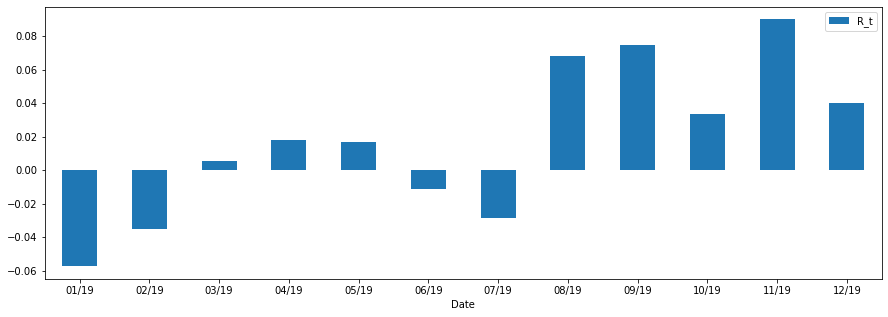

In [22]:
((1 + USDBRL_2019_monthly_returns.dropna()).cumprod() - 1)\
    .reset_index()\
    .assign(Date=lambda x: x['Date'].dt.strftime('%m/%y'))\
    .plot.bar(x='Date', y='R_t', rot=0, figsize=(15,5));

É possível notar que o grande resultado para o ano do Dólar Americano ocorreu em julho/2019, após este mês ele ficou de lado mantendo esse resultado.

Uma outra forma interessante de ver o resultado dos retornos acumulados no tempo é visualizar o gráfico de linha dos retornos acumulados

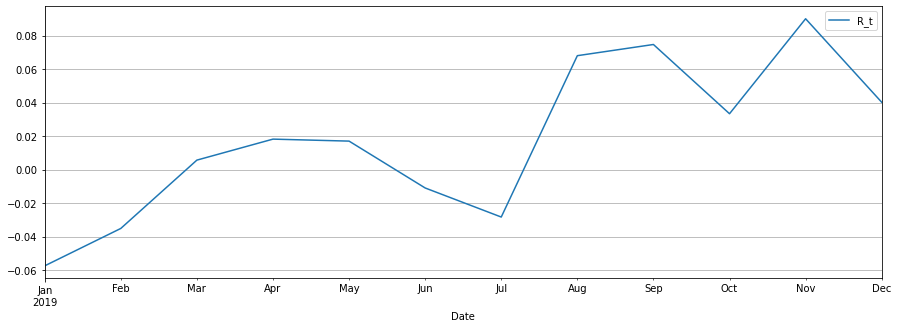

In [23]:
((1 + USDBRL_2019_monthly_returns.dropna()).cumprod() - 1).plot(figsize=(15,5), grid=True);

Note que ao fim do período temos os mesmos 4,02% acumulados, apenas sendo consistente.

Também podemos fazer para toda a série acumulada.


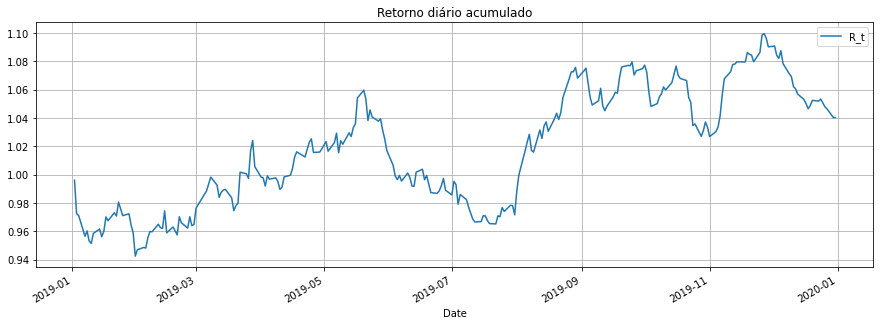

In [24]:
USDBRL_2019\
    .apply(lambda x: x.diff() / x.shift())\
    .apply(lambda x: (1 + x).cumprod())\
    .set_axis(['R_t'], axis=1)\
    .plot(figsize=(15,5), grid=True, title='Retorno diário acumulado');

Mais interessante é comparar mais de 1 ativos, vamos pegar 3 moedas: USD, CNY e GBP.

In [25]:
x = currency.get(['USD', 'CNY', 'GBP'], start_date='2018-12-31', end_date='2019-12-31')

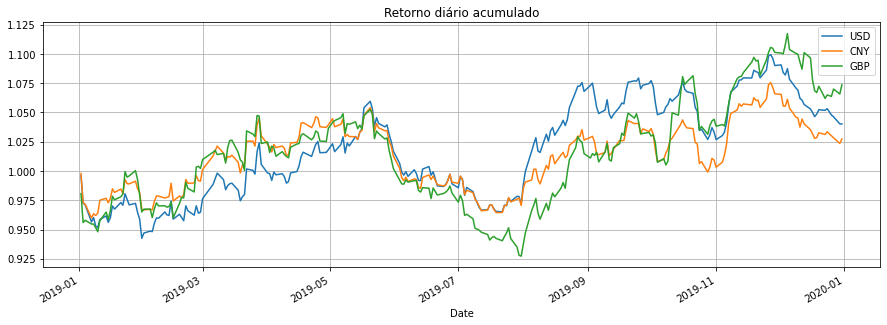

In [26]:
x.loc[:,pd.IndexSlice[:, 'ask']]\
    .set_axis(['USD', 'CNY', 'GBP'], axis=1)\
    .apply(lambda x: x.diff() / x.shift())\
    .apply(lambda x: (1 + x).cumprod())\
    .plot(figsize=(15,5), grid=True, title='Retorno diário acumulado');

Outra abordagem interessante é poder usar as cores para destacar uma série específica.

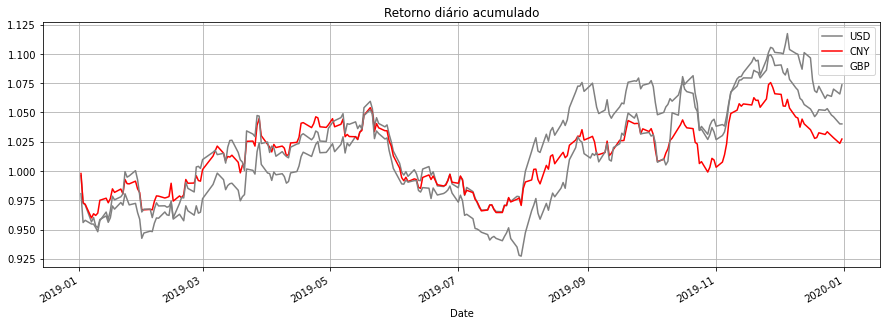

In [27]:
x.loc[:,pd.IndexSlice[:, 'ask']]\
    .set_axis(['USD', 'CNY', 'GBP'], axis=1)\
    .apply(lambda x: x.diff() / x.shift())\
    .apply(lambda x: (1 + x).cumprod())\
    .plot(figsize=(15,5), grid=True, title='Retorno diário acumulado', color=['gray', 'red', 'gray']);

### Retorno médio 

Outra pergunta interessante para se fazer aqui é: Tá ok, eu sei que o retorno simples para o Dólar Americano em 2019 foi de 10,37%, mas qual é o retorno mensal médio de 2019?
Este seria o retorno que poderíamos comparar com outros investimentos que também apresentam retornos mensais, como a Poupança por exemplo.

Sabendo que o retorno simples no período é dado pela Eq.\@ref(eq:simple-return-composed), podemos considerar que os retornos $R_t$ são constantes e iguais a $\hat{R}$.
Assim teríamos,

\begin{equation}
\begin{array}{lcr}
(1 + \bar{R}_{N}) & = & \prod_{i=0}^{N-1} (1 + \hat{R}) \\
                  & = & (1 + \hat{R})^N
\end{array}
\end{equation}

Consequentemente temos

\begin{equation}
(1 + \hat{R}) = (1 + \bar{R}_{N})^{\frac{1}{N}}
%#(\#eq:simple-mean-return-composed)
\end{equation}

É uma média geométrica dos retornos simples

$$
1 + \hat{R} = \left( \prod_{i=0}^{N-1} (1 + R_{t-i}) \right)^{\frac{1}{N}}
$$

> Esta é a razão pela qual é incorreto calcular a média aritimética dos retornos simples.

No Python calculamos essa operação usando a função de exponenciação `np.power` do `numpy`.

In [28]:
R_med = np.power((1 + USDBRL_2019_monthly_returns.dropna()).prod(), 1 / len(USDBRL_2019_monthly_returns.dropna())) - 1
R_med

R_t    0.003293
dtype: float64

Obtemos 0,33% ao mês! Para efeito de comparação, vamos considerar a taxa SELIC (taxa básica de juros na economia), esta taxa é de 2,0% ao ano.
Podemos calcular o seu equivalente mensal aplicando a mesma fórmula.


In [29]:
SELIC = 0.02
SELIC_med = (1 + SELIC) ** (1 / 12) - 1
SELIC_med

0.0016515813019202241

Temos 0,17%, aproximadamente a metade do retorno obtido com o Dólar Americano no ano de 2019.

## Retornos logaritimicos

Os retornos logaritimicos são dados pela diferença entre os logarítimos dos preços dos ativos.

\begin{equation}
r_t = \log \left( \frac{P_t}{P_{t-1}} \right) = \log P_t - \log P_{t-1} = p_t - p_{t-1}
%(\#eq:log-return)
\end{equation}

No Python fazemos como na equação acima, tiramos a diferença dos logaritimos dos preços $P_t$.
Os logaritimos são calculados com a função `np.log`, que retorna um DataFrame (ou um Series, dependendo do que for passado), e a diferença é calculada com o método `diff` do pandas.

In [30]:
np.log(USDBRL).diff()\
    .set_axis(['r_t'], axis=1)

,r_t
Date,
2020-09-01,NaN
2020-09-02,0.000167
2020-09-03,-0.012395
2020-09-04,-0.004362


Como o termo *retorno logaritimico* é muito extenso pra escrever e falar, vamos usar com mais frequência o termo **log-retorno**.


### Entendendo os preços em função dos retornos

Invertendo a equação de log-retorno para obter a equação dos preços, da mesma maneira que fizemos com a equação dos retornos simples, temos:

\begin{equation}
P_t =  P_{t-1} \exp\left( r_t \right)
%(\#eq:log-price)
\end{equation}

### Composição dos log-retornos

A composição dos log-retornos se dá da seguinte forma:

\begin{equation}
\exp(\bar{r}_{N}) = \prod_{i=0}^{N-1} \exp(r_{t-i}) = \exp\left(\sum_{i=0}^{N-1} r_{t-i}\right)
\end{equation}

Dessa forma temos que o log-retorno no período, $\bar{r}_{N}$, é dado pela **soma** dos retornos

\begin{equation}
\bar{r}_{N} = \sum_{i=0}^{N-1} r_{t-i}
%(\#eq:log-return-composed)
\end{equation}

Podemos calcular o log-retorno no período usando o método `sum` do objeto Series.
Usando a série de preços do Dólar Americano em 2019, temos:

In [31]:
np.log(USDBRL_2019_monthly).diff().sum()

close    0.039446
dtype: float64

Note que o log-retorno referente a 2019 é 3.94%, ligeiramente menor que o obtido com o retorno simples, que foi de 4,02%.
Entretanto, estas duas abordagens são equivalentes, vamos ver isso em mais detalhes na seção de equivalência de retornos.

Podemos ainda no pandas calcular a série de log-retornos compostos usando o método `cumsum`, da mesma forma que fizemos com os retornos simples.

In [32]:
np.log(USDBRL_2019_monthly).diff().cumsum()

,close
Date,
2018-12-31,NaN
2019-01-31,-0.059246
2019-02-28,-0.035810
2019-03-31,0.005636
2019-04-30,0.018031
2019-05-31,0.016864
2019-06-30,-0.011055
2019-07-31,-0.028773
2019-08-31,0.065839


### Log-retorno médio

Voltando a pergunta: *Tá ok, eu sei que o log-retorno para o Dólar Americano em 2019 foi de 9,87%, mas qual é o retorno mensal médio de 2019?*

Dado que o log-retorno para um período com múltiplos retornos é dado pela soma dos retornos, temos que o log-retorno médio é dado pela média aritimética dos log-retornos.

\begin{equation}
\hat{r} = \frac{1}{N} \sum_{i=0}^{N-1} r_{t-i}
%(\#eq:mean-log-return-composed)
\end{equation}

Utilizamos o método `mean` no Pandas para calcular o log-retorno médio para uma série de retornos

In [33]:
np.log(USDBRL_2019_monthly).diff().mean()

close    0.003287
dtype: float64

Obtivemos 0,33%, praticamente o mesmo resultado obtido com o retorno simples, que arredondado também ficou em 0,33%.

## Relação entre os retornos simples e logaritimicos <!-- {#s:equivalent-returns} -->

Como vimos anteriormente, os retornos simples e logaritimicos, são diferentes, mesmo quando se referem ao mesmo período.

Bem, vamos ver aqui que são duas formulações equivalentes, pois ambas são obtidas a partir dos mesmos preços.

Como $P_t$ deve ser sempre o mesmo, independente do retorno que estamos utilizando, então, usando as equações de preços, para retornos simples e log-retornos, podemos obter a relação entre os retornos simples e logaritimicos.

\begin{equation}
1 + R_t =  \exp\left( r_t \right)
%(\#eq:arithmetic-log-return-relation)
\end{equation}

## Porque formas diferentes de calcular os retornos?

Bem, faz sentido trabalhar com duas formas diferentes de calcular retornos?
Honestamente, não!
Entretanto, os retornos simples são mais intuitivos de serem utilizados nos cálculos de retornos, por outro lado os log-retornos são mais fáceis de manipular nos cálculos, principalmente devido ao fato de que podem ser somados.

Devido a simplicidade de uso dos log-retornos, a grande maioria dos estudos de alocação de ativos e risco de investimentos utiliza os log-retornos.

Nas próximas seções vamos abordar os conceitos de **retorno esperado** e **risco esperado** para ativos e veremos que a utilização de log-retornos é fundamental.

## Retorno esperado

O **retorno esperado** é equivalente ao *retorno médio*.
Há diversas outras formas de estimar o retorno esperado, desde modelos matemáticos complexos até hipóteses bem fundamentadas sobre o comportamento dos ativos.
Aqui vamos considerar a análise estatística em que, dada uma amostra de retornos, o retorno médio é um bom estimador para retornos futuros.
Justamente por ser o valor médio, o mais comum, o *esperado* para essa amostra.

Na estatística, a média aritimética é estimador para a média consistente para a média de uma amostra.
Por esse motivo os log-retornos são utilizado para o cálculo do retorno esperado, pois são equivalentes a média aritimética dos retornos.

\begin{equation}
\hat{r} = \frac{1}{N} \sum_{i=0}^{N-1} r_{t-i}
\end{equation}

A partir daqui vamos assumir que o retorno esperado é a média aritimética dos log-retornos.

### Retornos anualizados

Outro conceito importante é o de retorno anualizado.
Primeiro: porque anualizar os retornos?
No mercado financeiro é muito comum se trabalhar com taxas ao ano como a SELIC e o CDI, que são taxas básicas de juros e sempre são cotadas ao ano.
Dessa forma, é interessante converter os retornos para uma base anual de maneira que seja possível comparar os retornos esperados com retornos de outros investimentos.

Para calcular o retorno anualizado, multiplicamos o retorno esperado pela quantidade de períodos que temos em 1 ano.
Por exemplo:

- retorno esperado diário - multiplicamos por 252, que é uma convenção adotada no mercado brasileiro que significa 252 dias úteis por ano.
- retorno esperado mensal - multiplicamos por 12, pois 1 ano tem 12 meses.

Vamos utilizar a nossa série `USDBRL_2019` com as cotações do Dólar Americano para 2019.
Primeiro vamos calcular os retornos diários

In [34]:
USDBRL_2019_daily_returns = np.log(USDBRL_2019).diff()
USDBRL_2019_daily_mean_return = USDBRL_2019_daily_returns.mean()
USDBRL_2019_daily_mean_return

USD  ask    0.000156
dtype: float64

Note que o retorno diário para o USDBRL em 2019 foi de 0,0156%.
Vamos multiplicá-lo por 252 para encontrar o retorno anualizado


In [35]:
USDBRL_2019_daily_mean_return * 252

USD  ask    0.03929
dtype: float64

Obtivemos 3,93% com retorno diário anualizado, ficou bastante próximo do retorno anual calculado com a composição dos retornos mensais que ficou em 3,94%.

Utilizando os retornos mensais

In [36]:
USDBRL_2019_monthly_log_returns = np.log(USDBRL_2019_monthly).diff()
USDBRL_2019_monthly_mean_return = USDBRL_2019_monthly_log_returns.mean()
USDBRL_2019_monthly_mean_return

close    0.003287
dtype: float64

Multiplicando `USDBRL_2019_monthly_mean_return` por 12 para anualizar o retorno temos

In [37]:
USDBRL_2019_monthly_mean_return * 12

close    0.039446
dtype: float64

Novamente a estimativa do retorno anualizado ficou muito próximo dos valores já encontrados, 3,94%.

A anualização dos retornos é muito útil para converter os retornos entre períodos diários, mensais e anuais com contas simples que podem produzir análises interessantes para comparação de investimentos.

## Risco esperado

Há diversas formas de calcular o risco esperado de um ativo.
Aqui vamos considerar que a volatilidade dos log-retornos será a medida de **risco esperado** para o ativo.

Para calcular a volatilidade precisamos calcular a variância dos log-retornos, que é dada pela fórmula:


$$
\textrm{Var}(r_t) = \frac{1}{N-1}\sum_{i=0}^{N-1}\left( r_{t-i} - \bar{r} \right)^2
$$
A **volatilidade** dos retornos é dada pela raiz quadrada da variância e representada por $\sigma$.

$$
\sigma = \sqrt{\textrm{Var}(r_t)}
$$

A volatilidade também é conhecida como desvio padrão dos retornos, na verdade é o contrário, mas a ordem dos fatores não altera o produto.
A volatilidade é um conceito amplo para descrever o comportamento da dinâmica de um ativo.
Há diversas formas de estimar a volatilidade, aqui estamos assumindo a raiz quadrada da variância amostral.
Contudo, a volatilidade **não é observada**, diferente dos preços dos ativos e das taxas de juros, logo, sua estimação é sempre calcada em um conjunto de hipóteses.
Em termos gerais, o objetivo de caracterizar o risco esperado em termos da volatilidade é que a partir dessa medida possamos definir perdas esperadas associadas a probabilidades.
Ou mesmo que não defina-se uma perda esperada, conhecendo a volatilidade de diferentes ativos é possível comparar os ativos por uma métrica de risco esperado potencial.

No Pandas utilizamos o método `std` (de *standard deviation*)

In [38]:
USDBRL_2019_daily_returns.std()

USD  ask    0.006972
dtype: float64

O desvio padrão tem uma relação direta com os retornos, eles estão na mesma *unidade*.
Aqui temos uma volatilidade de 0,69% para um retorno esperado de 0,0156%.
Já já vamos saber como avaliar se isso é bom ou ruim, comparado a que?

Por esse motivo o desvio padrão é utilizado para definir um **intervalo de confiança** para o retorno esperado.
Por ora vamos segurar um pouco aqui, mais adiante vamos trazer uma abordagem estatística sobre os retornos e vamos falar mais sobre o desvio padrão.

### Volatilidade anualizada

Da mesma maneira que anualizamos os retornos, é necessário anualizar a volatilidade para evitar que façamos comparações de maçãs com bananas.

A conta aqui é menos direta então vou colocar direto a equação.
Para anualizar volatilidade diária (obtida de retornos diários) multiplicamos por raiz quadrada de 252 (quantidade de dias úteis no ano).

\begin{equation}
\sigma_a = \sigma_d\sqrt{252}
\end{equation}

Para anualizar volatilidade mensal multiplicamos por raiz quadrada de 12 (número de meses no ano)

\begin{equation}
\sigma_a = \sigma_m\sqrt{12}
\end{equation}

No exemplo acima, temos a volatilidade diária, logo, para anualizar a volatilidade vamos multiplicar por $\sqrt{252}$.

In [39]:
USDBRL_2019_daily_returns.std() * np.sqrt(252)

USD  ask    0.11067
dtype: float64

Com a volatilidade anualizada podemos escrever que o retorno anualizado é de 3,9% com uma volatilidade de 11%.
Nas próximas seções vamos entender  como comparar ativos com diferentes medidas de risco e retorno.

## Exercícios - Análise de Retornos

1. Obtenha as séries de preços ajustados de Petrobrás PN (PETR4.SA), Lojas Renner (LREN3.SA), Ambev (ABEV3.SA), da ETF SMAL11 (SMAL11.SA) e do Índice IBOVESPA (^BVSP), para o período de 2010-12-31 a 2020-01-01 (10 anos de dados). Estas séries possuem valores faltantes, é necessário fazer o tratamento. Para cada uma destas séries faça:
    1. Limpeza dos dados faltantes
    1. Cálculo do log-retorno diário
    1. Cálculo do retorno esperado anualizado
    1. Cálculo da volatilidade esperada anualizada
1. Com as séries dos exercício anterior, faça para cada uma delas:
    1. Limpeza dos dados faltantes
    1. Cálculo do log-retorno diário
    1. Dividir as séries em 5 períodos de 2 anos cada e calcule as estatísticas: retorno esperado e volatilidade anualizados, para cada sub-período.
    1. O que você observa? As medidas permanecem *constantes* ao longo do tempo?
1. Obtenha as séries de preços de Banco Itaú PN (ITUB4.SA), VALE (LREN3.SA), da ETF IVVB11 (IVVB11.SA) (replica o índice S&P 500), da ETF PIBB11 (PIBB11.SA) (replica o índice IBrX50), para o período de 2015-01-01 a 2020-01-01 (5 anos de dados). Estas séries possuem valores faltantes, é necessário fazer o tratamento. Para cada uma destas séries faça:
    1. Limpeza dos dados faltantes
    1. Cálculo da série de preços mensais
    1. Cálculo do log-retorno mensal
    1. Cálculo do retorno esperado e volatilidade mensal
    1. Cálculo do retorno esperado e volatilidade anualizados
1. Repita a análise do segundo exercício utilizando as moedas USD, EUR, CNY, GBP e CHF em BRL.
1. Fazer gráfico de comparação da rentabilidade de ativos. Usar a série do Magazine Luiza (MGLU3.SA) no período de 2015-01-01 até 2020-12-31 e comparar com:
    1. CDI acumulado no período
    1. IBOVESPA
    1. IPCA